In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import LowessSmoother
import skfda
from skfda.representation.interpolation import SplineInterpolation
from sklearn.preprocessing import normalize
import skfda
from skfda import datasets
from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda.exploratory.visualization import Boxplot

# Andiamo ad aprire le bande dei campi 4 e 6

In [13]:
with open('./pickles/campo4_bande.pickle', 'rb') as handle:
    campo4 = pickle.load(handle)
with open('./pickles/campo6_bande.pickle', 'rb') as handle:
    campo6 = pickle.load(handle)
with open('./pickles/days.pickle', 'rb') as handle:
    days = pickle.load(handle)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)

print(campo4.shape)
print(campo6.shape)

(57, 12, 43, 74)
(57, 12, 52, 84)


In [14]:
Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,3,:,:])/(campo4[:,7,:,:]+campo4[:,3,:,:])

Allpixelndre4 = (campo4[:,7,:,:]-campo4[:,4,:,:])/(campo4[:,7,:,:]+campo4[:,4,:,:])

Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,3,:,:])/(campo6[:,7,:,:]+campo6[:,3,:,:])

Allpixelndre6 = (campo6[:,7,:,:]-campo6[:,4,:,:])/(campo6[:,7,:,:]+campo6[:,4,:,:])

NDVI_cut_4 = Allpixelndvi4[18:50,:,:]
NDRE_cut_4 = Allpixelndre4[18:50,:,:]
NDVI_cut_6 = Allpixelndvi6[18:50,:,:]
NDRE_cut_6 = Allpixelndre6[18:50,:,:]

C:\Users\pc\AppData\Local\Temp\ipykernel_9716\4022297960.py:1: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi4 = (campo4[:,7,:,:]-campo4[:,3,:,:])/(campo4[:,7,:,:]+campo4[:,3,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_9716\4022297960.py:3: RuntimeWarning: invalid value encountered in divide
  Allpixelndre4 = (campo4[:,7,:,:]-campo4[:,4,:,:])/(campo4[:,7,:,:]+campo4[:,4,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_9716\4022297960.py:5: RuntimeWarning: invalid value encountered in divide
  Allpixelndvi6 = (campo6[:,7,:,:]-campo6[:,3,:,:])/(campo6[:,7,:,:]+campo6[:,3,:,:])
C:\Users\pc\AppData\Local\Temp\ipykernel_9716\4022297960.py:7: RuntimeWarning: invalid value encountered in divide
  Allpixelndre6 = (campo6[:,7,:,:]-campo6[:,4,:,:])/(campo6[:,7,:,:]+campo6[:,4,:,:])


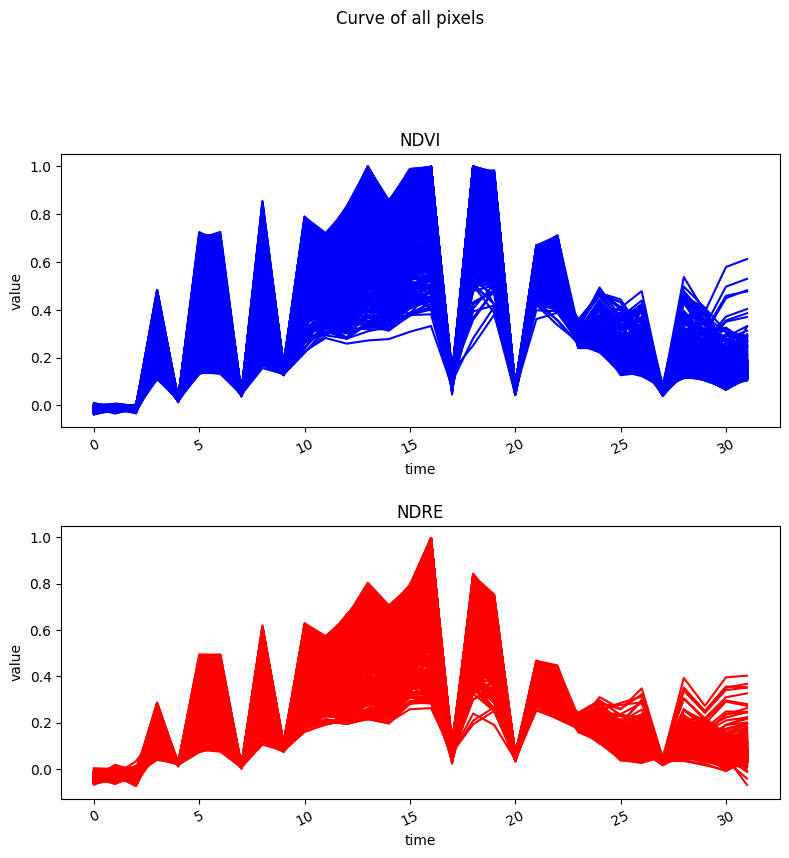

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.suptitle('Curve of all pixels')
fig.tight_layout(pad=5.0)
plt.sca(axs[0])
plt.title('NDVI')
plt.xticks(rotation=25) # Needed for rotating the date labels
validePixelNDVI_4 = np.zeros([32,43,74])
validePixelNDRE_4 = np.zeros([32,43,74])
for a in range(NDVI_cut_4.shape[1]):
    for b in range(NDVI_cut_4.shape[2]):
        if(np.sum(NDVI_cut_4[:,a,b] != 0)):
            validePixelNDVI_4[:,a,b] = NDVI_cut_4[:,a,b]
            validePixelNDRE_4[:,a,b] = NDRE_cut_4[:,a,b]
        #axs.plot(date,NDVI[:,a,b],color='blue')

for a in range(validePixelNDVI_4.shape[1]):
    for b in range(validePixelNDVI_4.shape[2]):
        axs[0].plot(range(32),validePixelNDVI_4[:,a,b],color='blue')
        axs[0].set_xlabel("time")
        axs[0].set_ylabel("value")
    

for a in range(validePixelNDRE_4.shape[1]):
    for b in range(validePixelNDRE_4.shape[2]):
        axs[1].plot(range(32),validePixelNDRE_4[:,a,b],color='red')
        axs[1].set_xlabel("time")
        axs[1].set_ylabel("value")

plt.sca(axs[1])
plt.title('NDRE')
plt.xticks(rotation=25)
plt.show()

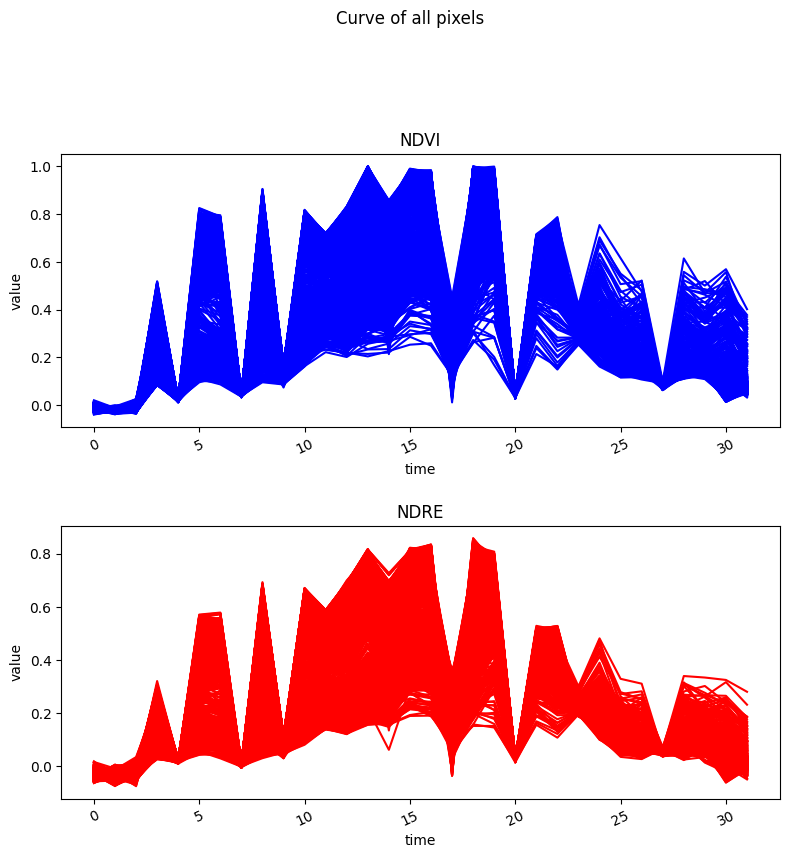

In [16]:

'''for a in range(Allpixelndvi6.shape[1]):
    for b in range(Allpixelndvi6.shape[2]):
        if(not np.isnan(np.sum(Allpixelndvi6[:,a,b]))):
            validePixelNDVI6[:,a,b] = Allpixelndvi6[:,a,b]'''

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 9))
fig.suptitle('Curve of all pixels')
fig.tight_layout(pad=5.0)
plt.sca(axs[0])
plt.title('NDVI')
plt.xticks(rotation=25) # Needed for rotating the date labels
validePixelNDVI_6 = np.zeros([32,52,84])
validePixelNDRE_6 = np.zeros([32,52,84])
for a in range(NDVI_cut_6.shape[1]):
    for b in range(NDVI_cut_6.shape[2]):
        if(np.sum(NDVI_cut_6[:,a,b] != 0)):
            validePixelNDVI_6[:,a,b] = NDVI_cut_6[:,a,b]
            validePixelNDRE_6[:,a,b] = NDRE_cut_6[:,a,b]
        #axs.plot(date,NDVI[:,a,b],color='blue')

for a in range(validePixelNDVI_6.shape[1]):
    for b in range(validePixelNDVI_6.shape[2]):
        axs[0].plot(range(32),validePixelNDVI_6[:,a,b],color='blue')
        axs[0].set_xlabel("time")
        axs[0].set_ylabel("value")
    

for a in range(validePixelNDRE_6.shape[1]):
    for b in range(validePixelNDRE_6.shape[2]):
        axs[1].plot(range(32),validePixelNDRE_6[:,a,b],color='red')
        axs[1].set_xlabel("time")
        axs[1].set_ylabel("value")

plt.sca(axs[1])
plt.title('NDRE')
plt.xticks(rotation=25)
plt.show()

In [17]:
#print(validePixelNDVI4)
print(np.array(validePixelNDVI_6).shape)

(32, 52, 84)


248835


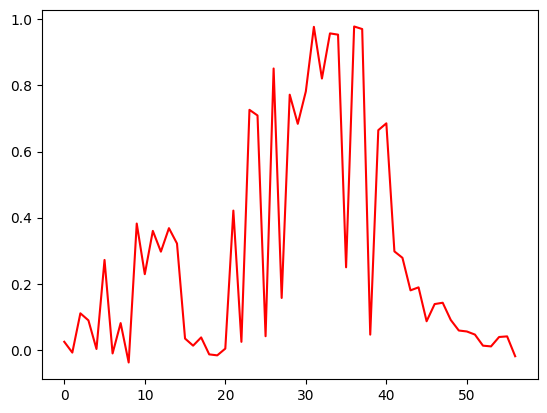

In [18]:
print(np.count_nonzero(Allpixelndvi6))
plt.plot(Allpixelndvi6[:,30,30], color="red")

# Creo il dataGrid per la creazione delle curve

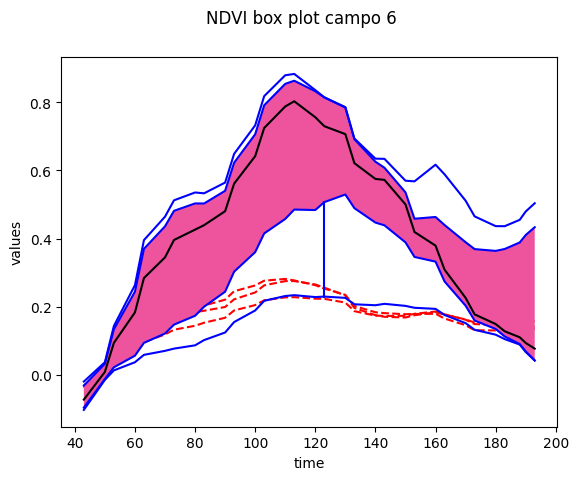

In [19]:
'''imageSmooth_6 = np.zeros([57, 52, 84])

for x in range(validePixelNDVI6.shape[1]):
    for y in range(validePixelNDVI6.shape[2]):
        imageSmooth_6[:,x,y] = smoother.smooth(validePixelNDVI6[:,x,y]).smooth_data[0]

plt.plot(imageSmooth_6[:,30,30])'''

grid_points = days  # Grid points of the curves
data_matrixNDVI = []
for a in range(validePixelNDVI_6.shape[1]):
    for b in range(validePixelNDVI_6.shape[2]):
        if(not np.isnan(np.sum(validePixelNDVI_6[:,a,b]))):
            data_matrixNDVI.append(smoother.smooth(validePixelNDVI_6[:,a,b]).smooth_data[0])


fd_NDVI_6 = skfda.FDataGrid(
    data_matrix=data_matrixNDVI,
    grid_points=grid_points,
    dataset_name="NDVI box plot campo 6",
    argument_names=('time',),
    coordinate_names=('values',)
)

fdBoxplot = Boxplot(fd_NDVI_6)
fdBoxplot.show_full_outliers = True
fdBoxplot.plot()
print() # need for avoid duplicate plot

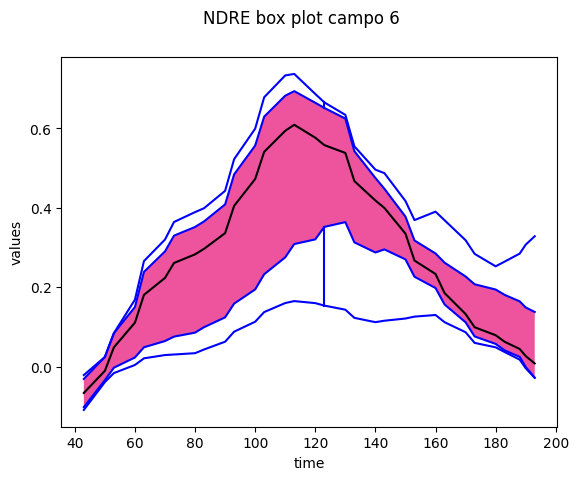

In [20]:
grid_points = days  # Grid points of the curves
data_matrixNDRE = []
for a in range(validePixelNDRE_6.shape[1]):
    for b in range(validePixelNDRE_6.shape[2]):
        if(not np.isnan(np.sum(validePixelNDRE_6[:,a,b]))):
            data_matrixNDRE.append(smoother.smooth(validePixelNDRE_6[:,a,b]).smooth_data[0])


fd_NDRE_6 = skfda.FDataGrid(
    data_matrix=data_matrixNDRE,
    grid_points=grid_points,
    dataset_name="NDRE box plot campo 6",
    argument_names=('time',),
    coordinate_names=('values',)
)

fdBoxplot = Boxplot(fd_NDRE_6)
fdBoxplot.show_full_outliers = True
fdBoxplot.plot()
print() # need for avoid duplicate plot

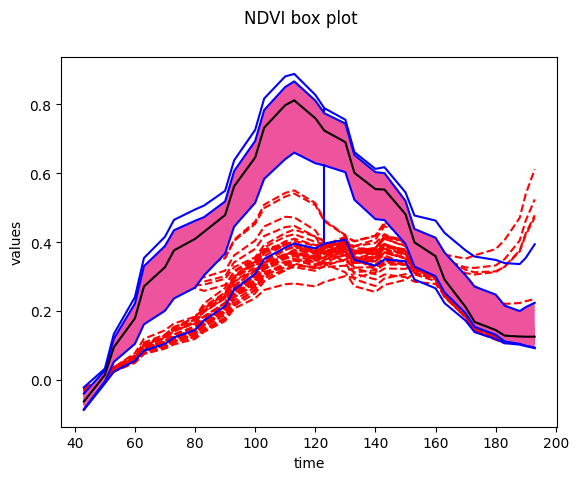

In [21]:
grid_points = days  # Grid points of the curves
data_matrixNDVI = []
for a in range(validePixelNDVI_4.shape[1]):
    for b in range(validePixelNDVI_4.shape[2]):
        if(not np.isnan(np.sum(validePixelNDVI_4[:,a,b]))):
            data_matrixNDVI.append(smoother.smooth(validePixelNDVI_4[:,a,b]).smooth_data[0])


fd_NDVI_4 = skfda.FDataGrid(
    data_matrix=data_matrixNDVI,
    grid_points=grid_points,
    dataset_name="NDVI box plot",
    argument_names=('time',),
    coordinate_names=('values',)
)

fdBoxplot = Boxplot(fd_NDVI_4)
fdBoxplot.show_full_outliers = True
fdBoxplot.plot()
print() # need for avoid duplicate plot

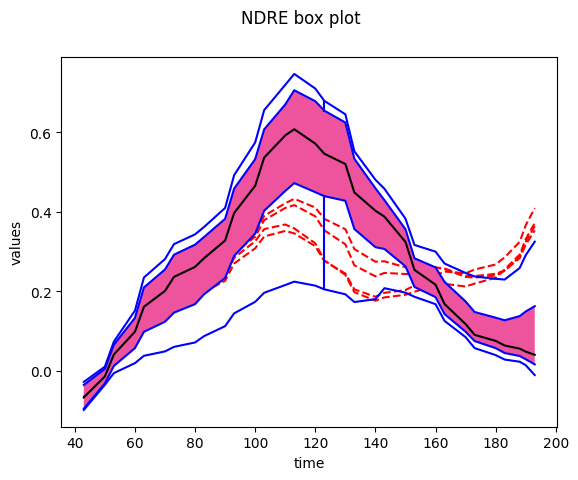

In [22]:
grid_points = days  # Grid points of the curves
data_matrixNDRE = []
for a in range(validePixelNDRE_4.shape[1]):
    for b in range(validePixelNDRE_4.shape[2]):
        if(not np.isnan(np.sum(validePixelNDRE_4[:,a,b]))):
            data_matrixNDRE.append(smoother.smooth(validePixelNDRE_4[:,a,b]).smooth_data[0])


fd_NDRE_4 = skfda.FDataGrid(
    data_matrix=data_matrixNDRE,
    grid_points=grid_points,
    dataset_name="NDRE box plot",
    argument_names=('time',),
    coordinate_names=('values',)
)

fdBoxplot = Boxplot(fd_NDRE_4)
fdBoxplot.show_full_outliers = True
fdBoxplot.plot()
print() # need for avoid duplicate plot